# Bank Marketing Dataset

# CGAN Training for synthesize datasets


CGAN: A conditional generative adversarial network (CGAN) is a type of GAN that also takes advantage of labels during the training process. Generator — Given a label and random array as input, this network generates data with the same structure as the training data observations corresponding to the same label.

Then, we save the CGAN models for the data generation pipeline.

In [138]:
# TODO
# try also https://github.com/sdv-dev/CTGAN

## Imports

In [1]:
import os
import pandas as pd
import numpy as np
from ydata_synthetic.synthesizers.regular import CGAN
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from src.pipeline.data_generation.data_generator import GANDataGenerator
from src.pipeline.datasets.training_datasets import BankMarketingProcessedDataset
from src.pipeline.model.paths import BANK_MARKETING_GEN_CGAN_MODEL_PATH


2021-12-23 22:22:12.648955: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reading the Datasets

# Load Preprocessed Data

# EDA and Preprocessing

In [65]:
# init GANDataGenerator
print('Bank Marketing dataset\n')
origin_dataset = BankMarketingProcessedDataset()

df = origin_dataset.raw_df
label_col = origin_dataset.label_column_name

df.head()
df.shape

print(f'Label columns name is: {label_col}. With {df[label_col].nunique()} unique values.'
      f'({df[label_col].unique()})')


Bank Marketing dataset

loading dataset


,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


(4521, 52)

Label columns name is: y. With 2 unique values.([0 1])


In [67]:
train_sample = df.sample(4521)

In [70]:
cat_cols = [col for col in df.columns if any(cat_col for cat_col in origin_dataset.categorical_feature_names if cat_col + '_' in col)]
numeric_cols = [col for col in df.columns if any(numeric_col for numeric_col in origin_dataset.numeric_feature_names if numeric_col in col)]

numeric_cols.remove('job_management')

# assert len(cat_cols)+len(numeric_cols) == len(df.columns)


# Init the GAN

In [74]:

to_save = False

#Define the Conditional GAN and training parameters

noise_dim = 32
dim = 128
batch_size = 128
beta_1 = 0.5
beta_2 = 0.9

log_step = 100
epochs = 500 + 1
learning_rate = 5e-4


gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           n_cols=train_sample.shape[1] - 1,  # Don't count the label columns here
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             cache_prefix='',
                             sample_interval=log_step,
                             label_dim=-1,
                             labels=[0,1])

num_classes = df[label_col].nunique()

#Init the Conditional GAN providing the index of the label column as one of the arguments
synthesizer = CGAN(model_parameters=gan_args, num_classes=num_classes)




# Training


In [75]:
#----------------------------
#    GAN Training
#----------------------------

#Training the Conditional GAN
synthesizer.train(data=train_sample, label_col=label_col, train_arguments=train_args,
                 num_cols=numeric_cols, cat_cols=cat_cols )

#Saving the synthesizer
if to_save:
    synthesizer.save(BANK_MARKETING_GEN_CGAN_MODEL_PATH)

  0%|          | 0/301 [00:00<?, ?it/s]

0 [D loss: 0.036691, acc.: 100.00%] [G loss: 3.860453]



  1%|          | 2/301 [00:07<18:25,  3.70s/it]

1 [D loss: 0.000629, acc.: 100.00%] [G loss: 8.398649]


  1%|          | 3/301 [00:10<16:35,  3.34s/it]

2 [D loss: 0.000016, acc.: 100.00%] [G loss: 16.275906]


  1%|▏         | 4/301 [00:13<15:23,  3.11s/it]

3 [D loss: 0.000015, acc.: 100.00%] [G loss: 16.502548]


  2%|▏         | 5/301 [00:16<14:51,  3.01s/it]

4 [D loss: 0.000002, acc.: 100.00%] [G loss: 20.215670]


  2%|▏         | 6/301 [00:19<14:34,  2.96s/it]

5 [D loss: 0.000003, acc.: 100.00%] [G loss: 23.012604]


  2%|▏         | 7/301 [00:22<14:29,  2.96s/it]

6 [D loss: 0.000019, acc.: 100.00%] [G loss: 31.555435]


  3%|▎         | 8/301 [00:24<14:23,  2.95s/it]

7 [D loss: 0.000015, acc.: 100.00%] [G loss: 22.208426]


  3%|▎         | 9/301 [00:27<14:25,  2.96s/it]

8 [D loss: 0.000003, acc.: 100.00%] [G loss: 33.268051]


  3%|▎         | 10/301 [00:30<14:15,  2.94s/it]

9 [D loss: 0.000002, acc.: 100.00%] [G loss: 33.849106]


  4%|▎         | 11/301 [00:33<14:00,  2.90s/it]

10 [D loss: 0.000008, acc.: 100.00%] [G loss: 29.447855]


  4%|▍         | 12/301 [00:36<14:02,  2.92s/it]

11 [D loss: 0.000002, acc.: 100.00%] [G loss: 34.117111]


  4%|▍         | 13/301 [00:39<14:14,  2.97s/it]

12 [D loss: 0.000000, acc.: 100.00%] [G loss: 32.901985]


  5%|▍         | 14/301 [00:42<14:09,  2.96s/it]

13 [D loss: 0.000000, acc.: 100.00%] [G loss: 40.499237]


  5%|▍         | 15/301 [00:45<13:56,  2.92s/it]

14 [D loss: 0.000004, acc.: 100.00%] [G loss: 36.335220]


  5%|▌         | 16/301 [00:48<14:00,  2.95s/it]

15 [D loss: 0.000004, acc.: 100.00%] [G loss: 37.652420]


  6%|▌         | 17/301 [00:51<13:38,  2.88s/it]

16 [D loss: 0.000004, acc.: 100.00%] [G loss: 40.106392]


  6%|▌         | 18/301 [00:53<13:25,  2.85s/it]

17 [D loss: 0.000007, acc.: 100.00%] [G loss: 45.899818]


  6%|▋         | 19/301 [00:56<13:24,  2.85s/it]

18 [D loss: 0.000001, acc.: 100.00%] [G loss: 49.226608]


  7%|▋         | 20/301 [00:59<13:36,  2.91s/it]

19 [D loss: 0.000004, acc.: 100.00%] [G loss: 47.310535]


  7%|▋         | 21/301 [01:02<13:28,  2.89s/it]

20 [D loss: 0.000000, acc.: 100.00%] [G loss: 58.658073]


  7%|▋         | 22/301 [01:05<13:25,  2.89s/it]

21 [D loss: 0.000004, acc.: 100.00%] [G loss: 60.741394]


  8%|▊         | 23/301 [01:08<13:44,  2.97s/it]

22 [D loss: 0.000002, acc.: 100.00%] [G loss: 55.719357]


  8%|▊         | 24/301 [01:11<13:36,  2.95s/it]

23 [D loss: 0.000008, acc.: 100.00%] [G loss: 59.684036]


  8%|▊         | 25/301 [01:14<13:21,  2.91s/it]

24 [D loss: 0.000237, acc.: 100.00%] [G loss: 54.589874]


  9%|▊         | 26/301 [01:17<13:08,  2.87s/it]

25 [D loss: 0.000000, acc.: 100.00%] [G loss: 59.954964]


  9%|▉         | 27/301 [01:20<12:57,  2.84s/it]

26 [D loss: 0.000000, acc.: 100.00%] [G loss: 74.870010]


  9%|▉         | 28/301 [01:22<12:53,  2.83s/it]

27 [D loss: 0.000000, acc.: 100.00%] [G loss: 67.240318]


 10%|▉         | 29/301 [01:25<12:54,  2.85s/it]

28 [D loss: 0.000000, acc.: 100.00%] [G loss: 59.553795]


 10%|▉         | 30/301 [01:28<12:57,  2.87s/it]

29 [D loss: 0.000000, acc.: 100.00%] [G loss: 69.294289]


 10%|█         | 31/301 [01:31<12:51,  2.86s/it]

30 [D loss: 0.000019, acc.: 100.00%] [G loss: 69.785065]


 11%|█         | 32/301 [01:34<12:47,  2.85s/it]

31 [D loss: 0.000239, acc.: 100.00%] [G loss: 71.457642]


 11%|█         | 33/301 [01:37<12:41,  2.84s/it]

32 [D loss: 0.000001, acc.: 100.00%] [G loss: 60.551872]


 11%|█▏        | 34/301 [01:39<12:36,  2.83s/it]

33 [D loss: 0.000000, acc.: 100.00%] [G loss: 67.055771]


 12%|█▏        | 35/301 [01:42<12:28,  2.82s/it]

34 [D loss: 0.000000, acc.: 100.00%] [G loss: 76.148354]


 12%|█▏        | 36/301 [01:45<12:20,  2.80s/it]

35 [D loss: 0.000000, acc.: 100.00%] [G loss: 69.711044]


 12%|█▏        | 37/301 [01:48<12:16,  2.79s/it]

36 [D loss: 0.000000, acc.: 100.00%] [G loss: 65.048920]


 13%|█▎        | 38/301 [01:51<12:15,  2.80s/it]

37 [D loss: 0.000000, acc.: 100.00%] [G loss: 81.804291]


 13%|█▎        | 39/301 [01:53<12:17,  2.82s/it]

38 [D loss: 0.000000, acc.: 100.00%] [G loss: 86.775475]


 13%|█▎        | 40/301 [01:56<12:15,  2.82s/it]

39 [D loss: 0.000000, acc.: 100.00%] [G loss: 84.467606]


 14%|█▎        | 41/301 [01:59<12:10,  2.81s/it]

40 [D loss: 0.000000, acc.: 100.00%] [G loss: 88.862617]


 14%|█▍        | 42/301 [02:02<12:26,  2.88s/it]

41 [D loss: 0.000000, acc.: 100.00%] [G loss: 72.207153]


 14%|█▍        | 43/301 [02:05<12:26,  2.89s/it]

42 [D loss: 0.016087, acc.: 99.61%] [G loss: 90.993332]


 15%|█▍        | 44/301 [02:08<12:27,  2.91s/it]

43 [D loss: 0.000001, acc.: 100.00%] [G loss: 85.749969]


 15%|█▍        | 45/301 [02:11<12:16,  2.88s/it]

44 [D loss: 0.000000, acc.: 100.00%] [G loss: 79.093063]


 15%|█▌        | 46/301 [02:14<12:10,  2.86s/it]

45 [D loss: 0.000000, acc.: 100.00%] [G loss: 83.587189]


 16%|█▌        | 47/301 [02:17<12:15,  2.89s/it]

46 [D loss: 0.000000, acc.: 100.00%] [G loss: 87.179695]


 16%|█▌        | 48/301 [02:19<12:02,  2.85s/it]

47 [D loss: 0.000000, acc.: 100.00%] [G loss: 94.158638]


 16%|█▋        | 49/301 [02:22<11:59,  2.85s/it]

48 [D loss: 0.000001, acc.: 100.00%] [G loss: 84.809189]


 17%|█▋        | 50/301 [02:25<12:12,  2.92s/it]

49 [D loss: 0.000000, acc.: 100.00%] [G loss: 98.230789]


 17%|█▋        | 51/301 [02:28<12:26,  2.99s/it]

50 [D loss: 0.000000, acc.: 100.00%] [G loss: 81.968575]


 17%|█▋        | 52/301 [02:31<12:19,  2.97s/it]

51 [D loss: 0.000044, acc.: 100.00%] [G loss: 99.257957]


 18%|█▊        | 53/301 [02:34<12:11,  2.95s/it]

52 [D loss: 0.000000, acc.: 100.00%] [G loss: 105.533180]


 18%|█▊        | 54/301 [02:37<12:11,  2.96s/it]

53 [D loss: 0.000197, acc.: 100.00%] [G loss: 91.537689]


 18%|█▊        | 55/301 [02:40<12:19,  3.01s/it]

54 [D loss: 0.000000, acc.: 100.00%] [G loss: 108.744652]


 19%|█▊        | 56/301 [02:43<12:09,  2.98s/it]

55 [D loss: 0.000000, acc.: 100.00%] [G loss: 99.747513]


 19%|█▉        | 57/301 [02:46<12:03,  2.96s/it]

56 [D loss: 0.000000, acc.: 100.00%] [G loss: 115.529419]


 19%|█▉        | 58/301 [02:49<12:00,  2.96s/it]

57 [D loss: 0.000000, acc.: 100.00%] [G loss: 106.209526]


 20%|█▉        | 59/301 [02:52<11:54,  2.95s/it]

58 [D loss: 0.000104, acc.: 100.00%] [G loss: 131.957764]


 20%|█▉        | 60/301 [02:55<11:54,  2.96s/it]

59 [D loss: 0.000000, acc.: 100.00%] [G loss: 125.781166]


 20%|██        | 61/301 [02:58<11:53,  2.97s/it]

60 [D loss: 0.000000, acc.: 100.00%] [G loss: 118.279190]


 21%|██        | 62/301 [03:01<11:53,  2.99s/it]

61 [D loss: 0.000001, acc.: 100.00%] [G loss: 124.569595]


 21%|██        | 63/301 [03:04<11:39,  2.94s/it]

62 [D loss: 0.000000, acc.: 100.00%] [G loss: 127.320129]


 21%|██▏       | 64/301 [03:07<11:26,  2.90s/it]

63 [D loss: 0.000000, acc.: 100.00%] [G loss: 126.206917]


 22%|██▏       | 65/301 [03:10<11:20,  2.88s/it]

64 [D loss: 0.000000, acc.: 100.00%] [G loss: 102.908646]


 22%|██▏       | 66/301 [03:13<11:36,  2.97s/it]

65 [D loss: 0.000001, acc.: 100.00%] [G loss: 122.359741]


 22%|██▏       | 67/301 [03:16<11:28,  2.94s/it]

66 [D loss: 0.000000, acc.: 100.00%] [G loss: 136.577728]


 23%|██▎       | 68/301 [03:19<11:40,  3.01s/it]

67 [D loss: 0.000002, acc.: 100.00%] [G loss: 134.933685]


 23%|██▎       | 69/301 [03:22<11:23,  2.95s/it]

68 [D loss: 0.000008, acc.: 100.00%] [G loss: 130.201691]


 23%|██▎       | 70/301 [03:25<11:33,  3.00s/it]

69 [D loss: 0.000000, acc.: 100.00%] [G loss: 122.215561]


 24%|██▎       | 71/301 [03:28<11:37,  3.03s/it]

70 [D loss: 0.000833, acc.: 100.00%] [G loss: 135.846619]


 24%|██▍       | 72/301 [03:31<11:23,  2.99s/it]

71 [D loss: 0.000000, acc.: 100.00%] [G loss: 117.779114]


 24%|██▍       | 73/301 [03:33<11:09,  2.94s/it]

72 [D loss: 0.000000, acc.: 100.00%] [G loss: 156.829895]


 25%|██▍       | 74/301 [03:36<11:04,  2.93s/it]

73 [D loss: 0.000000, acc.: 100.00%] [G loss: 140.222733]


 25%|██▍       | 75/301 [03:39<11:08,  2.96s/it]

74 [D loss: 0.000000, acc.: 100.00%] [G loss: 158.184845]


 25%|██▌       | 76/301 [03:42<11:02,  2.94s/it]

75 [D loss: 0.000000, acc.: 100.00%] [G loss: 157.663040]


 26%|██▌       | 77/301 [03:45<11:07,  2.98s/it]

76 [D loss: 0.000000, acc.: 100.00%] [G loss: 153.414703]


 26%|██▌       | 78/301 [03:48<11:06,  2.99s/it]

77 [D loss: 0.000000, acc.: 100.00%] [G loss: 161.284760]


 26%|██▌       | 79/301 [03:51<10:49,  2.93s/it]

78 [D loss: 0.000000, acc.: 100.00%] [G loss: 154.769073]


 27%|██▋       | 80/301 [03:54<10:40,  2.90s/it]

79 [D loss: 0.000000, acc.: 100.00%] [G loss: 174.041138]


 27%|██▋       | 81/301 [03:57<10:32,  2.88s/it]

80 [D loss: 0.000000, acc.: 100.00%] [G loss: 172.428604]


 27%|██▋       | 82/301 [04:00<10:42,  2.94s/it]

81 [D loss: 0.000000, acc.: 100.00%] [G loss: 146.300980]


 28%|██▊       | 83/301 [04:03<10:48,  2.97s/it]

82 [D loss: 0.000000, acc.: 100.00%] [G loss: 208.537567]


 28%|██▊       | 84/301 [04:06<10:41,  2.95s/it]

83 [D loss: 0.000000, acc.: 100.00%] [G loss: 139.767487]


 28%|██▊       | 85/301 [04:09<10:36,  2.95s/it]

84 [D loss: 0.000000, acc.: 100.00%] [G loss: 164.008545]


 29%|██▊       | 86/301 [04:12<10:27,  2.92s/it]

85 [D loss: 0.000001, acc.: 100.00%] [G loss: 176.133377]


 29%|██▉       | 87/301 [04:15<10:31,  2.95s/it]

86 [D loss: 0.000000, acc.: 100.00%] [G loss: 157.934784]


 29%|██▉       | 88/301 [04:18<10:22,  2.92s/it]

87 [D loss: 0.000000, acc.: 100.00%] [G loss: 155.095932]


 30%|██▉       | 89/301 [04:21<10:23,  2.94s/it]

88 [D loss: 0.000006, acc.: 100.00%] [G loss: 186.851379]


 30%|██▉       | 90/301 [04:23<10:14,  2.91s/it]

89 [D loss: 0.000000, acc.: 100.00%] [G loss: 183.182297]


 30%|███       | 91/301 [04:26<10:13,  2.92s/it]

90 [D loss: 0.000000, acc.: 100.00%] [G loss: 182.681549]


 31%|███       | 92/301 [04:29<10:06,  2.90s/it]

91 [D loss: 0.000000, acc.: 100.00%] [G loss: 183.567719]


 31%|███       | 93/301 [04:32<10:03,  2.90s/it]

92 [D loss: 0.000000, acc.: 100.00%] [G loss: 177.363617]


 31%|███       | 94/301 [04:35<09:59,  2.90s/it]

93 [D loss: 0.000000, acc.: 100.00%] [G loss: 156.391937]


 32%|███▏      | 95/301 [04:38<09:59,  2.91s/it]

94 [D loss: 0.000000, acc.: 100.00%] [G loss: 194.277435]


 32%|███▏      | 96/301 [04:41<09:58,  2.92s/it]

95 [D loss: 0.000000, acc.: 100.00%] [G loss: 165.119125]


 32%|███▏      | 97/301 [04:44<10:03,  2.96s/it]

96 [D loss: 0.000000, acc.: 100.00%] [G loss: 186.723175]


 33%|███▎      | 98/301 [04:47<10:00,  2.96s/it]

97 [D loss: 0.000000, acc.: 100.00%] [G loss: 162.738785]


 33%|███▎      | 99/301 [04:50<09:55,  2.95s/it]

98 [D loss: 0.000000, acc.: 100.00%] [G loss: 178.882629]


 33%|███▎      | 100/301 [04:53<09:53,  2.95s/it]

99 [D loss: 0.000000, acc.: 100.00%] [G loss: 195.315765]
100 [D loss: 0.000000, acc.: 100.00%] [G loss: 193.144745]



 34%|███▍      | 102/301 [04:59<10:01,  3.02s/it]

101 [D loss: 0.000000, acc.: 100.00%] [G loss: 186.673035]


 34%|███▍      | 103/301 [05:02<09:50,  2.98s/it]

102 [D loss: 0.000000, acc.: 100.00%] [G loss: 192.007324]


 35%|███▍      | 104/301 [05:05<09:41,  2.95s/it]

103 [D loss: 0.000000, acc.: 100.00%] [G loss: 182.413635]


 35%|███▍      | 105/301 [05:08<09:34,  2.93s/it]

104 [D loss: 0.000000, acc.: 100.00%] [G loss: 143.936996]


 35%|███▌      | 106/301 [05:11<09:26,  2.91s/it]

105 [D loss: 0.000000, acc.: 100.00%] [G loss: 168.666046]


 36%|███▌      | 107/301 [05:13<09:24,  2.91s/it]

106 [D loss: 0.000000, acc.: 100.00%] [G loss: 203.580948]


 36%|███▌      | 108/301 [05:16<09:13,  2.87s/it]

107 [D loss: 0.000000, acc.: 100.00%] [G loss: 234.771973]


 36%|███▌      | 109/301 [05:19<09:05,  2.84s/it]

108 [D loss: 0.000000, acc.: 100.00%] [G loss: 201.116867]


 37%|███▋      | 110/301 [05:22<08:58,  2.82s/it]

109 [D loss: 0.000000, acc.: 100.00%] [G loss: 222.993286]


 37%|███▋      | 111/301 [05:25<08:57,  2.83s/it]

110 [D loss: 0.000000, acc.: 100.00%] [G loss: 196.346558]


 37%|███▋      | 112/301 [05:28<09:01,  2.86s/it]

111 [D loss: 0.000000, acc.: 100.00%] [G loss: 184.005432]


 38%|███▊      | 113/301 [05:31<09:04,  2.89s/it]

112 [D loss: 0.000000, acc.: 100.00%] [G loss: 213.350769]


 38%|███▊      | 114/301 [05:34<09:10,  2.94s/it]

113 [D loss: 0.000000, acc.: 100.00%] [G loss: 182.063431]


 38%|███▊      | 115/301 [05:36<09:00,  2.90s/it]

114 [D loss: 0.000000, acc.: 100.00%] [G loss: 201.294495]


 39%|███▊      | 116/301 [05:39<08:53,  2.89s/it]

115 [D loss: 0.000000, acc.: 100.00%] [G loss: 200.328705]


 39%|███▉      | 117/301 [05:42<08:51,  2.89s/it]

116 [D loss: 0.000000, acc.: 100.00%] [G loss: 248.323364]


 39%|███▉      | 118/301 [05:45<08:47,  2.88s/it]

117 [D loss: 0.000000, acc.: 100.00%] [G loss: 204.233963]


 40%|███▉      | 119/301 [05:48<08:46,  2.89s/it]

118 [D loss: 0.000000, acc.: 100.00%] [G loss: 208.411194]


 40%|███▉      | 120/301 [05:51<08:42,  2.89s/it]

119 [D loss: 0.000000, acc.: 100.00%] [G loss: 211.194946]


 40%|████      | 121/301 [05:54<08:34,  2.86s/it]

120 [D loss: 0.000000, acc.: 100.00%] [G loss: 250.432968]


 41%|████      | 122/301 [05:56<08:28,  2.84s/it]

121 [D loss: 0.000000, acc.: 100.00%] [G loss: 234.955536]


 41%|████      | 123/301 [05:59<08:24,  2.84s/it]

122 [D loss: 0.000000, acc.: 100.00%] [G loss: 198.629730]


 41%|████      | 124/301 [06:02<08:34,  2.91s/it]

123 [D loss: 0.000000, acc.: 100.00%] [G loss: 245.293716]


 42%|████▏     | 125/301 [06:05<08:34,  2.92s/it]

124 [D loss: 0.000000, acc.: 100.00%] [G loss: 234.574402]


 42%|████▏     | 126/301 [06:08<08:25,  2.89s/it]

125 [D loss: 0.000000, acc.: 100.00%] [G loss: 204.357269]


 42%|████▏     | 127/301 [06:11<08:19,  2.87s/it]

126 [D loss: 0.000000, acc.: 100.00%] [G loss: 233.567200]


 43%|████▎     | 128/301 [06:14<08:22,  2.90s/it]

127 [D loss: 0.000000, acc.: 100.00%] [G loss: 209.974823]


 43%|████▎     | 129/301 [06:17<08:22,  2.92s/it]

128 [D loss: 0.000000, acc.: 100.00%] [G loss: 224.724823]


 43%|████▎     | 130/301 [06:20<08:18,  2.92s/it]

129 [D loss: 0.000000, acc.: 100.00%] [G loss: 226.101624]


 44%|████▎     | 131/301 [06:23<08:09,  2.88s/it]

130 [D loss: 0.000000, acc.: 100.00%] [G loss: 230.631409]


 44%|████▍     | 132/301 [06:25<08:01,  2.85s/it]

131 [D loss: 0.000000, acc.: 100.00%] [G loss: 284.561707]


 44%|████▍     | 133/301 [06:28<07:57,  2.84s/it]

132 [D loss: 0.000000, acc.: 100.00%] [G loss: 260.400879]


 45%|████▍     | 134/301 [06:31<07:57,  2.86s/it]

133 [D loss: 0.000000, acc.: 100.00%] [G loss: 214.903564]


 45%|████▍     | 135/301 [06:34<07:54,  2.86s/it]

134 [D loss: 0.000000, acc.: 100.00%] [G loss: 265.517181]


 45%|████▌     | 136/301 [06:37<07:50,  2.85s/it]

135 [D loss: 0.000000, acc.: 100.00%] [G loss: 214.578247]


 46%|████▌     | 137/301 [06:40<07:55,  2.90s/it]

136 [D loss: 0.000000, acc.: 100.00%] [G loss: 297.278259]


 46%|████▌     | 138/301 [06:43<07:52,  2.90s/it]

137 [D loss: 0.000000, acc.: 100.00%] [G loss: 267.817993]


 46%|████▌     | 139/301 [06:45<07:48,  2.89s/it]

138 [D loss: 0.000000, acc.: 100.00%] [G loss: 259.943542]


 47%|████▋     | 140/301 [06:48<07:43,  2.88s/it]

139 [D loss: 0.000000, acc.: 100.00%] [G loss: 266.266754]


 47%|████▋     | 141/301 [06:51<07:41,  2.89s/it]

140 [D loss: 0.000000, acc.: 100.00%] [G loss: 271.119171]


 47%|████▋     | 142/301 [06:54<07:45,  2.93s/it]

141 [D loss: 0.000000, acc.: 100.00%] [G loss: 216.044601]


 48%|████▊     | 143/301 [06:57<07:37,  2.89s/it]

142 [D loss: 0.000000, acc.: 100.00%] [G loss: 259.100403]


 48%|████▊     | 144/301 [07:00<07:38,  2.92s/it]

143 [D loss: 0.000000, acc.: 100.00%] [G loss: 283.723328]


 48%|████▊     | 145/301 [07:03<07:34,  2.91s/it]

144 [D loss: 0.000000, acc.: 100.00%] [G loss: 268.775269]


 49%|████▊     | 146/301 [07:06<07:27,  2.89s/it]

145 [D loss: 0.000000, acc.: 100.00%] [G loss: 275.361389]


 49%|████▉     | 147/301 [07:09<07:23,  2.88s/it]

146 [D loss: 0.000000, acc.: 100.00%] [G loss: 235.820175]


 49%|████▉     | 148/301 [07:11<07:19,  2.87s/it]

147 [D loss: 0.000000, acc.: 100.00%] [G loss: 238.884155]


 50%|████▉     | 149/301 [07:14<07:17,  2.88s/it]

148 [D loss: 0.000000, acc.: 100.00%] [G loss: 281.107239]


 50%|████▉     | 150/301 [07:17<07:13,  2.87s/it]

149 [D loss: 0.000000, acc.: 100.00%] [G loss: 242.469070]


 50%|█████     | 151/301 [07:20<07:16,  2.91s/it]

150 [D loss: 0.000000, acc.: 100.00%] [G loss: 289.102020]


 50%|█████     | 152/301 [07:23<07:11,  2.89s/it]

151 [D loss: 0.000000, acc.: 100.00%] [G loss: 213.507874]


 51%|█████     | 153/301 [07:26<07:06,  2.89s/it]

152 [D loss: 0.000000, acc.: 100.00%] [G loss: 229.274170]


 51%|█████     | 154/301 [07:29<07:03,  2.88s/it]

153 [D loss: 0.000000, acc.: 100.00%] [G loss: 263.644958]


 51%|█████▏    | 155/301 [07:32<06:58,  2.86s/it]

154 [D loss: 0.000000, acc.: 100.00%] [G loss: 311.946350]


 52%|█████▏    | 156/301 [07:34<06:52,  2.85s/it]

155 [D loss: 0.000000, acc.: 100.00%] [G loss: 241.265518]


 52%|█████▏    | 157/301 [07:37<06:49,  2.84s/it]

156 [D loss: 0.000000, acc.: 100.00%] [G loss: 258.903748]


 52%|█████▏    | 158/301 [07:40<06:48,  2.86s/it]

157 [D loss: 0.000000, acc.: 100.00%] [G loss: 294.673126]


 53%|█████▎    | 159/301 [07:43<06:48,  2.88s/it]

158 [D loss: 0.000000, acc.: 100.00%] [G loss: 312.744080]


 53%|█████▎    | 160/301 [07:46<06:42,  2.85s/it]

159 [D loss: 0.000000, acc.: 100.00%] [G loss: 280.873291]


 53%|█████▎    | 161/301 [07:49<06:36,  2.83s/it]

160 [D loss: 0.000000, acc.: 100.00%] [G loss: 298.833191]


 54%|█████▍    | 162/301 [07:52<06:42,  2.89s/it]

161 [D loss: 0.000000, acc.: 100.00%] [G loss: 265.942627]


 54%|█████▍    | 163/301 [07:55<06:49,  2.97s/it]

162 [D loss: 0.000000, acc.: 100.00%] [G loss: 289.881958]


 54%|█████▍    | 164/301 [07:58<06:38,  2.91s/it]

163 [D loss: 0.000000, acc.: 100.00%] [G loss: 259.905029]


 55%|█████▍    | 165/301 [08:00<06:31,  2.88s/it]

164 [D loss: 0.000000, acc.: 100.00%] [G loss: 264.817139]


 55%|█████▌    | 166/301 [08:03<06:25,  2.86s/it]

165 [D loss: 0.000000, acc.: 100.00%] [G loss: 226.074097]


 55%|█████▌    | 167/301 [08:06<06:26,  2.89s/it]

166 [D loss: 0.000000, acc.: 100.00%] [G loss: 272.768250]


 56%|█████▌    | 168/301 [08:09<06:21,  2.87s/it]

167 [D loss: 0.000000, acc.: 100.00%] [G loss: 292.147217]


 56%|█████▌    | 169/301 [08:12<06:14,  2.84s/it]

168 [D loss: 0.000000, acc.: 100.00%] [G loss: 282.007202]


 56%|█████▋    | 170/301 [08:15<06:15,  2.87s/it]

169 [D loss: 0.000000, acc.: 100.00%] [G loss: 313.366608]


 57%|█████▋    | 171/301 [08:17<06:06,  2.82s/it]

170 [D loss: 0.000000, acc.: 100.00%] [G loss: 290.530273]


 57%|█████▋    | 172/301 [08:20<06:02,  2.81s/it]

171 [D loss: 0.000000, acc.: 100.00%] [G loss: 256.164307]


 57%|█████▋    | 173/301 [08:23<06:00,  2.81s/it]

172 [D loss: 0.000000, acc.: 100.00%] [G loss: 278.360535]


 58%|█████▊    | 174/301 [08:26<05:59,  2.83s/it]

173 [D loss: 0.000000, acc.: 100.00%] [G loss: 265.427277]


 58%|█████▊    | 175/301 [08:29<05:58,  2.85s/it]

174 [D loss: 0.000000, acc.: 100.00%] [G loss: 272.848511]


 58%|█████▊    | 176/301 [08:32<05:56,  2.85s/it]

175 [D loss: 0.000000, acc.: 100.00%] [G loss: 270.382263]


 59%|█████▉    | 177/301 [08:35<05:54,  2.86s/it]

176 [D loss: 0.076150, acc.: 99.61%] [G loss: 298.649597]


 59%|█████▉    | 178/301 [08:38<05:54,  2.89s/it]

177 [D loss: 0.000125, acc.: 100.00%] [G loss: 288.729095]


 59%|█████▉    | 179/301 [08:41<06:03,  2.98s/it]

178 [D loss: 0.000000, acc.: 100.00%] [G loss: 305.712128]


 60%|█████▉    | 180/301 [08:44<05:59,  2.97s/it]

179 [D loss: 0.000000, acc.: 100.00%] [G loss: 333.091797]


 60%|██████    | 181/301 [08:47<05:54,  2.95s/it]

180 [D loss: 0.000000, acc.: 100.00%] [G loss: 301.873474]


 60%|██████    | 182/301 [08:49<05:47,  2.92s/it]

181 [D loss: 0.000000, acc.: 100.00%] [G loss: 314.548553]


 61%|██████    | 183/301 [08:52<05:44,  2.92s/it]

182 [D loss: 0.000000, acc.: 100.00%] [G loss: 246.712906]


 61%|██████    | 184/301 [08:55<05:39,  2.91s/it]

183 [D loss: 0.000000, acc.: 100.00%] [G loss: 317.759338]


 61%|██████▏   | 185/301 [08:58<05:39,  2.92s/it]

184 [D loss: 0.000000, acc.: 100.00%] [G loss: 377.507385]


 62%|██████▏   | 186/301 [09:01<05:40,  2.96s/it]

185 [D loss: 0.000000, acc.: 100.00%] [G loss: 310.003845]


 62%|██████▏   | 187/301 [09:04<05:40,  2.99s/it]

186 [D loss: 0.000000, acc.: 100.00%] [G loss: 291.314209]


 62%|██████▏   | 188/301 [09:08<05:47,  3.08s/it]

187 [D loss: 0.000000, acc.: 100.00%] [G loss: 322.034485]


 63%|██████▎   | 189/301 [09:10<05:37,  3.01s/it]

188 [D loss: 0.000000, acc.: 100.00%] [G loss: 274.444489]


 63%|██████▎   | 190/301 [09:14<05:43,  3.10s/it]

189 [D loss: 0.000000, acc.: 100.00%] [G loss: 262.829010]


 63%|██████▎   | 191/301 [09:17<05:36,  3.06s/it]

190 [D loss: 0.000000, acc.: 100.00%] [G loss: 286.988678]


 64%|██████▍   | 192/301 [09:20<05:32,  3.05s/it]

191 [D loss: 0.000000, acc.: 100.00%] [G loss: 289.370453]


 64%|██████▍   | 193/301 [09:23<05:34,  3.10s/it]

192 [D loss: 0.000000, acc.: 100.00%] [G loss: 344.273621]


 64%|██████▍   | 194/301 [09:26<05:25,  3.04s/it]

193 [D loss: 0.000000, acc.: 100.00%] [G loss: 277.754944]


 65%|██████▍   | 195/301 [09:29<05:19,  3.01s/it]

194 [D loss: 0.000000, acc.: 100.00%] [G loss: 338.167969]


 65%|██████▌   | 196/301 [09:32<05:13,  2.99s/it]

195 [D loss: 0.000000, acc.: 100.00%] [G loss: 278.612183]


 65%|██████▌   | 197/301 [09:35<05:07,  2.96s/it]

196 [D loss: 0.000000, acc.: 100.00%] [G loss: 335.973511]


 66%|██████▌   | 198/301 [09:37<04:58,  2.90s/it]

197 [D loss: 0.000000, acc.: 100.00%] [G loss: 315.549927]


 66%|██████▌   | 199/301 [09:40<04:53,  2.88s/it]

198 [D loss: 0.000000, acc.: 100.00%] [G loss: 329.287323]


 66%|██████▋   | 200/301 [09:43<04:48,  2.85s/it]

199 [D loss: 0.000000, acc.: 100.00%] [G loss: 301.718628]
200 [D loss: 0.000000, acc.: 100.00%] [G loss: 278.312927]



 67%|██████▋   | 202/301 [09:49<04:46,  2.90s/it]

201 [D loss: 0.000000, acc.: 100.00%] [G loss: 312.257843]


 67%|██████▋   | 203/301 [09:52<04:40,  2.86s/it]

202 [D loss: 0.000000, acc.: 100.00%] [G loss: 373.212311]


 68%|██████▊   | 204/301 [09:54<04:35,  2.84s/it]

203 [D loss: 0.000000, acc.: 100.00%] [G loss: 379.162262]


 68%|██████▊   | 205/301 [09:57<04:32,  2.84s/it]

204 [D loss: 0.000000, acc.: 100.00%] [G loss: 359.806702]


 68%|██████▊   | 206/301 [10:00<04:30,  2.85s/it]

205 [D loss: 0.000000, acc.: 100.00%] [G loss: 344.520325]


 69%|██████▉   | 207/301 [10:03<04:31,  2.89s/it]

206 [D loss: 0.000000, acc.: 100.00%] [G loss: 331.128174]


 69%|██████▉   | 208/301 [10:06<04:31,  2.92s/it]

207 [D loss: 0.000000, acc.: 100.00%] [G loss: 326.148407]


 69%|██████▉   | 209/301 [10:09<04:31,  2.95s/it]

208 [D loss: 0.000000, acc.: 100.00%] [G loss: 333.391937]


 70%|██████▉   | 210/301 [10:12<04:31,  2.98s/it]

209 [D loss: 0.000000, acc.: 100.00%] [G loss: 389.500610]


 70%|███████   | 211/301 [10:15<04:27,  2.97s/it]

210 [D loss: 0.000000, acc.: 100.00%] [G loss: 352.761780]


 70%|███████   | 212/301 [10:18<04:21,  2.93s/it]

211 [D loss: 0.000000, acc.: 100.00%] [G loss: 349.438477]


 71%|███████   | 213/301 [10:21<04:20,  2.96s/it]

212 [D loss: 0.000000, acc.: 100.00%] [G loss: 329.312439]


 71%|███████   | 214/301 [10:24<04:17,  2.96s/it]

213 [D loss: 0.000000, acc.: 100.00%] [G loss: 380.895081]


 71%|███████▏  | 215/301 [10:27<04:13,  2.94s/it]

214 [D loss: 0.000000, acc.: 100.00%] [G loss: 342.168610]


 72%|███████▏  | 216/301 [10:30<04:11,  2.95s/it]

215 [D loss: 0.000000, acc.: 100.00%] [G loss: 305.538177]


 72%|███████▏  | 217/301 [10:33<04:05,  2.93s/it]

216 [D loss: 0.000000, acc.: 100.00%] [G loss: 366.366394]


 72%|███████▏  | 218/301 [10:36<04:03,  2.93s/it]

217 [D loss: 0.000000, acc.: 100.00%] [G loss: 314.954132]


 73%|███████▎  | 219/301 [10:39<03:57,  2.90s/it]

218 [D loss: 0.000000, acc.: 100.00%] [G loss: 323.245178]


 73%|███████▎  | 220/301 [10:41<03:53,  2.88s/it]

219 [D loss: 0.000001, acc.: 100.00%] [G loss: 288.404053]


 73%|███████▎  | 221/301 [10:44<03:49,  2.87s/it]

220 [D loss: 0.000000, acc.: 100.00%] [G loss: 361.022430]


 74%|███████▍  | 222/301 [10:47<03:53,  2.95s/it]

221 [D loss: 0.000000, acc.: 100.00%] [G loss: 361.743866]


 74%|███████▍  | 223/301 [10:50<03:51,  2.97s/it]

222 [D loss: 0.000000, acc.: 100.00%] [G loss: 287.375275]


 74%|███████▍  | 224/301 [10:53<03:46,  2.94s/it]

223 [D loss: 0.000000, acc.: 100.00%] [G loss: 334.373138]


 75%|███████▍  | 225/301 [10:56<03:43,  2.95s/it]

224 [D loss: 0.000000, acc.: 100.00%] [G loss: 346.957397]


 75%|███████▌  | 226/301 [10:59<03:40,  2.94s/it]

225 [D loss: 0.000000, acc.: 100.00%] [G loss: 325.959473]


 75%|███████▌  | 227/301 [11:02<03:36,  2.93s/it]

226 [D loss: 0.000000, acc.: 100.00%] [G loss: 313.145874]


 76%|███████▌  | 228/301 [11:05<03:33,  2.92s/it]

227 [D loss: 0.000000, acc.: 100.00%] [G loss: 365.372742]


 76%|███████▌  | 229/301 [11:08<03:30,  2.92s/it]

228 [D loss: 0.000000, acc.: 100.00%] [G loss: 362.942749]


 76%|███████▋  | 230/301 [11:11<03:29,  2.95s/it]

229 [D loss: 0.000000, acc.: 100.00%] [G loss: 309.338257]


 77%|███████▋  | 231/301 [11:14<03:23,  2.91s/it]

230 [D loss: 0.000000, acc.: 100.00%] [G loss: 346.865784]


 77%|███████▋  | 232/301 [11:16<03:18,  2.88s/it]

231 [D loss: 0.000000, acc.: 100.00%] [G loss: 310.025940]


 77%|███████▋  | 233/301 [11:19<03:16,  2.89s/it]

232 [D loss: 0.000000, acc.: 100.00%] [G loss: 316.508911]


 78%|███████▊  | 234/301 [11:22<03:11,  2.86s/it]

233 [D loss: 0.000000, acc.: 100.00%] [G loss: 370.711182]


 78%|███████▊  | 235/301 [11:25<03:08,  2.86s/it]

234 [D loss: 0.000000, acc.: 100.00%] [G loss: 317.490448]


 78%|███████▊  | 236/301 [11:28<03:07,  2.88s/it]

235 [D loss: 0.000000, acc.: 100.00%] [G loss: 301.789673]


 79%|███████▊  | 237/301 [11:31<03:04,  2.89s/it]

236 [D loss: 0.000000, acc.: 100.00%] [G loss: 377.712524]


 79%|███████▉  | 238/301 [11:34<03:03,  2.91s/it]

237 [D loss: 0.000000, acc.: 100.00%] [G loss: 253.015839]


 79%|███████▉  | 239/301 [11:37<02:58,  2.88s/it]

238 [D loss: 0.000000, acc.: 100.00%] [G loss: 350.165375]


 80%|███████▉  | 240/301 [11:40<02:56,  2.90s/it]

239 [D loss: 0.000000, acc.: 100.00%] [G loss: 339.631714]


 80%|████████  | 241/301 [11:43<02:57,  2.96s/it]

240 [D loss: 0.000000, acc.: 100.00%] [G loss: 312.448120]


 80%|████████  | 242/301 [11:46<02:54,  2.96s/it]

241 [D loss: 0.000000, acc.: 100.00%] [G loss: 393.220123]


 81%|████████  | 243/301 [11:49<02:50,  2.95s/it]

242 [D loss: 0.000000, acc.: 100.00%] [G loss: 382.679993]


 81%|████████  | 244/301 [11:51<02:45,  2.90s/it]

243 [D loss: 0.000000, acc.: 100.00%] [G loss: 377.975647]


 81%|████████▏ | 245/301 [11:54<02:40,  2.87s/it]

244 [D loss: 0.000000, acc.: 100.00%] [G loss: 451.263916]


 82%|████████▏ | 246/301 [11:57<02:36,  2.85s/it]

245 [D loss: 0.000000, acc.: 100.00%] [G loss: 342.393921]


 82%|████████▏ | 247/301 [12:00<02:34,  2.85s/it]

246 [D loss: 0.000000, acc.: 100.00%] [G loss: 283.063538]


 82%|████████▏ | 248/301 [12:03<02:33,  2.90s/it]

247 [D loss: 0.000000, acc.: 100.00%] [G loss: 366.386353]


 83%|████████▎ | 249/301 [12:06<02:30,  2.89s/it]

248 [D loss: 0.000000, acc.: 100.00%] [G loss: 386.242035]


 83%|████████▎ | 250/301 [12:09<02:26,  2.88s/it]

249 [D loss: 0.000000, acc.: 100.00%] [G loss: 339.888916]


 83%|████████▎ | 251/301 [12:12<02:25,  2.92s/it]

250 [D loss: 0.000000, acc.: 100.00%] [G loss: 359.291077]


 84%|████████▎ | 252/301 [12:15<02:28,  3.03s/it]

251 [D loss: 0.000000, acc.: 100.00%] [G loss: 377.478577]


 84%|████████▍ | 253/301 [12:18<02:23,  2.99s/it]

252 [D loss: 0.000000, acc.: 100.00%] [G loss: 389.388550]


 84%|████████▍ | 254/301 [12:21<02:21,  3.01s/it]

253 [D loss: 0.000000, acc.: 100.00%] [G loss: 303.350708]


 85%|████████▍ | 255/301 [12:24<02:18,  3.01s/it]

254 [D loss: 0.000000, acc.: 100.00%] [G loss: 382.905640]


 85%|████████▌ | 256/301 [12:27<02:17,  3.06s/it]

255 [D loss: 0.000000, acc.: 100.00%] [G loss: 395.897858]


 85%|████████▌ | 257/301 [12:30<02:14,  3.06s/it]

256 [D loss: 0.000000, acc.: 100.00%] [G loss: 375.221710]


 86%|████████▌ | 258/301 [12:33<02:09,  3.01s/it]

257 [D loss: 0.000000, acc.: 100.00%] [G loss: 357.297333]


 86%|████████▌ | 259/301 [12:36<02:04,  2.97s/it]

258 [D loss: 0.000000, acc.: 100.00%] [G loss: 392.576477]


 86%|████████▋ | 260/301 [12:39<02:00,  2.94s/it]

259 [D loss: 0.000000, acc.: 100.00%] [G loss: 423.186798]


 87%|████████▋ | 261/301 [12:42<01:57,  2.93s/it]

260 [D loss: 0.000000, acc.: 100.00%] [G loss: 385.916870]


 87%|████████▋ | 262/301 [12:45<01:57,  3.01s/it]

261 [D loss: 0.000000, acc.: 100.00%] [G loss: 379.176941]


 87%|████████▋ | 263/301 [12:48<01:53,  2.97s/it]

262 [D loss: 0.000000, acc.: 100.00%] [G loss: 407.041931]


 88%|████████▊ | 264/301 [12:51<01:48,  2.93s/it]

263 [D loss: 0.000000, acc.: 100.00%] [G loss: 408.261597]


 88%|████████▊ | 265/301 [12:53<01:44,  2.90s/it]

264 [D loss: 0.000000, acc.: 100.00%] [G loss: 400.979675]


 88%|████████▊ | 266/301 [12:56<01:40,  2.87s/it]

265 [D loss: 0.000000, acc.: 100.00%] [G loss: 377.763489]


 89%|████████▊ | 267/301 [12:59<01:36,  2.85s/it]

266 [D loss: 0.000000, acc.: 100.00%] [G loss: 425.467010]


 89%|████████▉ | 268/301 [13:02<01:33,  2.83s/it]

267 [D loss: 0.000000, acc.: 100.00%] [G loss: 320.184998]


 89%|████████▉ | 269/301 [13:04<01:30,  2.81s/it]

268 [D loss: 0.000000, acc.: 100.00%] [G loss: 425.840454]


 90%|████████▉ | 270/301 [13:07<01:26,  2.81s/it]

269 [D loss: 0.000000, acc.: 100.00%] [G loss: 366.570312]


 90%|█████████ | 271/301 [13:10<01:24,  2.80s/it]

270 [D loss: 0.000000, acc.: 100.00%] [G loss: 393.653778]


 90%|█████████ | 272/301 [13:13<01:21,  2.79s/it]

271 [D loss: 0.000000, acc.: 100.00%] [G loss: 378.922668]


 91%|█████████ | 273/301 [13:16<01:20,  2.87s/it]

272 [D loss: 0.000000, acc.: 100.00%] [G loss: 361.521881]


 91%|█████████ | 274/301 [13:19<01:17,  2.87s/it]

273 [D loss: 0.000000, acc.: 100.00%] [G loss: 403.267975]


 91%|█████████▏| 275/301 [13:22<01:14,  2.86s/it]

274 [D loss: 0.000000, acc.: 100.00%] [G loss: 413.726837]


 92%|█████████▏| 276/301 [13:24<01:10,  2.83s/it]

275 [D loss: 0.000000, acc.: 100.00%] [G loss: 423.637787]


 92%|█████████▏| 277/301 [13:27<01:08,  2.86s/it]

276 [D loss: 0.000000, acc.: 100.00%] [G loss: 407.661865]


 92%|█████████▏| 278/301 [13:30<01:06,  2.90s/it]

277 [D loss: 0.000000, acc.: 100.00%] [G loss: 359.521179]


 93%|█████████▎| 279/301 [13:33<01:03,  2.89s/it]

278 [D loss: 0.000000, acc.: 100.00%] [G loss: 379.252594]


 93%|█████████▎| 280/301 [13:36<01:00,  2.89s/it]

279 [D loss: 0.000000, acc.: 100.00%] [G loss: 344.069824]


 93%|█████████▎| 281/301 [13:39<00:57,  2.88s/it]

280 [D loss: 0.000000, acc.: 100.00%] [G loss: 407.680389]


 94%|█████████▎| 282/301 [13:42<00:54,  2.88s/it]

281 [D loss: 0.000000, acc.: 100.00%] [G loss: 383.078857]


 94%|█████████▍| 283/301 [13:45<00:51,  2.87s/it]

282 [D loss: 0.000000, acc.: 100.00%] [G loss: 427.555298]


 94%|█████████▍| 284/301 [13:47<00:48,  2.86s/it]

283 [D loss: 0.000000, acc.: 100.00%] [G loss: 404.911865]


 95%|█████████▍| 285/301 [13:50<00:46,  2.91s/it]

284 [D loss: 0.000000, acc.: 100.00%] [G loss: 424.942810]


 95%|█████████▌| 286/301 [13:53<00:43,  2.89s/it]

285 [D loss: 0.000000, acc.: 100.00%] [G loss: 417.925110]


 95%|█████████▌| 287/301 [13:56<00:40,  2.89s/it]

286 [D loss: 0.000000, acc.: 100.00%] [G loss: 434.801819]


 96%|█████████▌| 288/301 [13:59<00:37,  2.88s/it]

287 [D loss: 0.000000, acc.: 100.00%] [G loss: 417.287964]


 96%|█████████▌| 289/301 [14:02<00:34,  2.89s/it]

288 [D loss: 0.000000, acc.: 100.00%] [G loss: 442.631836]


 96%|█████████▋| 290/301 [14:05<00:31,  2.88s/it]

289 [D loss: 0.000000, acc.: 100.00%] [G loss: 378.454895]


 97%|█████████▋| 291/301 [14:08<00:28,  2.87s/it]

290 [D loss: 0.000000, acc.: 100.00%] [G loss: 490.525604]


 97%|█████████▋| 292/301 [14:11<00:25,  2.85s/it]

291 [D loss: 0.000000, acc.: 100.00%] [G loss: 415.740845]


 97%|█████████▋| 293/301 [14:13<00:22,  2.83s/it]

292 [D loss: 0.000000, acc.: 100.00%] [G loss: 403.191772]


 98%|█████████▊| 294/301 [14:16<00:19,  2.82s/it]

293 [D loss: 0.000000, acc.: 100.00%] [G loss: 454.196899]


 98%|█████████▊| 295/301 [14:19<00:17,  2.87s/it]

294 [D loss: 0.000000, acc.: 100.00%] [G loss: 472.086853]


 98%|█████████▊| 296/301 [14:22<00:14,  2.88s/it]

295 [D loss: 0.000000, acc.: 100.00%] [G loss: 472.599609]


 99%|█████████▊| 297/301 [14:25<00:11,  2.87s/it]

296 [D loss: 0.000000, acc.: 100.00%] [G loss: 409.443787]


 99%|█████████▉| 298/301 [14:28<00:08,  2.94s/it]

297 [D loss: 0.000000, acc.: 100.00%] [G loss: 428.754181]


 99%|█████████▉| 299/301 [14:31<00:05,  2.94s/it]

298 [D loss: 0.000000, acc.: 100.00%] [G loss: 377.152832]


100%|█████████▉| 300/301 [14:34<00:02,  2.92s/it]

299 [D loss: 0.000000, acc.: 100.00%] [G loss: 410.826721]
300 [D loss: 0.000000, acc.: 100.00%] [G loss: 374.407654]



100%|██████████| 301/301 [14:37<00:00,  2.92s/it]


# Save the model

In [76]:
synthesizer.save(BANK_MARKETING_GEN_CGAN_MODEL_PATH)

In [82]:
synthesizer = CGAN.load(BANK_MARKETING_GEN_CGAN_MODEL_PATH)

In [83]:
synthesizer.generator.summary()


Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           [(128, 1)]           0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (128, 1, 1)          2           input_38[0][0]                   
__________________________________________________________________________________________________
input_37 (InputLayer)           [(128, 32)]          0                                            
__________________________________________________________________________________________________
flatten_18 (Flatten)            (128, 1)             0           embedding_12[0][0]               
___________________________________________________________________________________________

In [84]:
synthesizer.discriminator.summary()

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(128, 1)]           0                                            
__________________________________________________________________________________________________
input_39 (InputLayer)           [(128, 95)]          0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (128, 1, 1)          2           input_40[0][0]                   
__________________________________________________________________________________________________
flatten_20 (Flatten)            (128, 95)            0           input_39[0][0]                   
___________________________________________________________________________________________

# Synthesize samples based on the trained CGAN:

In [101]:
generated_df_class_true = synthesizer.sample(condition=np.array([1]), n_samples=1)
generated_df_class_true

Synthetic data generation: 100%|██████████| 1/1 [00:00<00:00, 21.18it/s]


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,NaN
0,28,18026,3,858,-1,-50,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1.0
1,28,18351,2,868,-1,-49,0,0,0,1,...,1,1,1,1,1,0,0,0,0,1.0
2,28,18136,3,862,0,-49,0,0,0,0,...,1,1,0,0,1,0,0,1,1,1.0
3,28,18196,2,861,-1,-49,0,0,1,1,...,1,0,1,1,1,1,0,1,1,1.0
4,28,18284,3,867,-1,-50,0,0,1,1,...,0,1,1,1,0,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,28,18115,2,858,-1,-50,0,0,0,0,...,1,0,0,0,0,0,1,1,1,1.0
124,28,18371,3,873,-1,-50,0,0,0,0,...,0,1,1,1,1,0,0,1,0,1.0
125,28,18162,3,863,-1,-50,0,1,0,1,...,0,0,1,0,0,1,0,1,1,1.0
126,28,18144,3,862,-1,-50,0,0,1,0,...,1,1,1,0,0,1,1,1,0,1.0


In [137]:
generated_df_class_false = synthesizer.sample(condition=np.array([0]), n_samples=2)
generated_df_class_false

Synthetic data generation: 100%|██████████| 1/1 [00:00<00:00, 18.93it/s]


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,NaN
0,28,18182,3,863,-1,-50,0,1,0,1,...,1,1,1,0,0,1,1,0,0,0.0
1,28,18249,3,866,-1,-50,0,1,0,1,...,1,0,0,1,0,1,1,0,1,0.0
2,28,18180,3,861,-1,-50,0,1,1,0,...,0,0,1,0,0,1,1,1,0,0.0
3,28,18239,3,865,-1,-49,0,0,1,1,...,0,0,1,0,0,1,0,1,1,0.0
4,28,18001,3,856,-1,-50,0,0,1,1,...,1,1,1,0,0,0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,28,18211,3,866,-1,-50,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0.0
124,28,18235,3,864,-1,-49,0,0,1,0,...,0,1,1,1,1,0,1,1,1,0.0
125,28,18203,3,863,-1,-50,0,1,0,0,...,0,0,1,1,0,1,0,1,1,0.0
126,28,18205,3,863,-1,-49,0,0,0,1,...,0,0,1,1,1,1,1,1,1,0.0


# Comparing the synthesized data

In [110]:
numeric_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [117]:
real_df_class_true = df[df[label_col]==1].sample(128)
real_df_class_true.describe()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,41.648438,1541.164062,16.640625,578.882812,2.429688,56.226562,0.906250,1.0,0.093750,0.179688,...,0.078125,0.039062,0.187500,0.070312,0.085938,0.054688,0.093750,0.062500,0.179688,0.664062
std,12.348349,2984.180922,8.351278,443.141925,2.026143,98.575860,1.917337,0.0,0.292626,0.385436,...,0.269423,0.194505,0.391846,0.256678,0.281373,0.228263,0.292626,0.243013,0.385436,0.474173
min,20.000000,-701.000000,1.000000,30.000000,1.000000,-1.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,92.250000,10.000000,261.000000,1.000000,-1.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,737.500000,16.500000,472.000000,2.000000,-1.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,2046.000000,22.250000,747.250000,3.000000,94.250000,1.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,83.000000,26965.000000,31.000000,2456.000000,13.000000,541.000000,14.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
generated_df_class_true.describe()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,NaN
count,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.0,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,28.0,18192.812500,2.773438,862.992188,-0.859375,-49.695312,0.0,0.398438,0.492188,0.460938,...,0.437500,0.500000,0.500000,0.476562,0.484375,0.593750,0.476562,0.531250,0.492188,1.0
std,0.0,129.915706,0.420252,6.001963,0.349000,0.494992,0.0,0.491500,0.501903,0.500430,...,0.498028,0.501965,0.501965,0.501413,0.501719,0.493062,0.501413,0.500983,0.501903,0.0
min,28.0,17927.000000,2.000000,851.000000,-1.000000,-51.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,28.0,18093.000000,3.000000,859.000000,-1.000000,-50.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,28.0,18179.500000,3.000000,862.000000,-1.000000,-50.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
75%,28.0,18279.500000,3.000000,867.000000,-1.000000,-49.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,28.0,18612.000000,3.000000,883.000000,0.000000,-49.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [134]:
generated_df_class_true

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,NaN
0,28,18026,3,858,-1,-50,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1.0
1,28,18351,2,868,-1,-49,0,0,0,1,...,1,1,1,1,1,0,0,0,0,1.0
2,28,18136,3,862,0,-49,0,0,0,0,...,1,1,0,0,1,0,0,1,1,1.0
3,28,18196,2,861,-1,-49,0,0,1,1,...,1,0,1,1,1,1,0,1,1,1.0
4,28,18284,3,867,-1,-50,0,0,1,1,...,0,1,1,1,0,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,28,18115,2,858,-1,-50,0,0,0,0,...,1,0,0,0,0,0,1,1,1,1.0
124,28,18371,3,873,-1,-50,0,0,0,0,...,0,1,1,1,1,0,0,1,0,1.0
125,28,18162,3,863,-1,-50,0,1,0,1,...,0,0,1,0,0,1,0,1,1,1.0
126,28,18144,3,862,-1,-50,0,0,1,0,...,1,1,1,0,0,1,1,1,0,1.0


<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:ylabel='Frequency'>

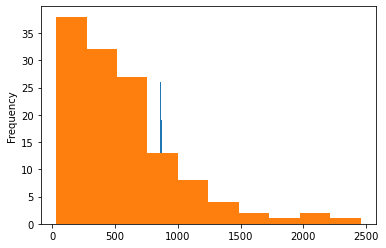

In [135]:
generated_df_class_true.duration.plot(kind='hist')
real_df_class_true.duration.plot(kind='hist')

In [93]:
# cat_cols = df.select_dtypes(include=['category']).columns
# numeric_cols = df.select_dtypes(exclude=['category']).columns
#
# print('categorical columns are:', cat_cols)
# print('numeric columns are:', numeric_cols)

In [85]:
# num_classes = df[label_col].nunique()
#
# df[label_col] = df[label_col].astype('category')
#
# # There's only 1 class, so essentially rename the 'Class' to 'Class_1',
# # which tells weather a sample data is of class 1 or not.
# df = pd.get_dummies(df, columns=[label_col], prefix='class', drop_first=True)
#
# train_sample = df.copy().reset_index(drop=True)
# print(f"df columns: {train_sample.columns}")
#
# # 'Class_1' label
# label_cols = [ i for i in train_sample.columns if 'class_' in i ]
#
# # All columns except 'Class_1'
# data_cols = [ i for i in train_sample.columns if i not in label_cols ]
#
# # Scale down the data, and rename it to 'train_no_label'
# train_sample[data_cols] = train_sample[data_cols].astype(int) / 10 # scale to random noise size, one less thing to learn
#
# # TODO To remove:
# train_no_label = train_sample[data_cols]

In [86]:
models = {'GAN': ['GAN', False, synthesizer.generator]}


In [ ]:
# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=train_sample, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols+label_cols)
labels = fraud_w_classes['Class']

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
class_labels = ['Class 1','Class 2']

col1, col2 = 'V17', 'V10'

base_dir = 'cache/'

# Actual fraud data visualization
model_steps = [ 0, 100, 200]
rows = len(model_steps)
columns = 1 + len(models)

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

# Go through each of the 3 model_step values -> 0, 100, 200
for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)

    # Plot 'Class 1' and 'Class 2' samples taken from the original data, in a random shuffled fashion
    for group, color, marker, label in zip(real_samples.groupby('Class_1'), colors, markers, class_labels ):
        plt.scatter( group[1][[col1]], group[1][[col2]], 
                         label=label, marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('Actual Fraud Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')

    # Go through all the GAN models listed in 'model_names' and defined in 'models'
    for i, model_name in enumerate( model_names[:] ):

        [model_name, with_class, generator_model] = models[model_name]

        generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

        if with_class:
            g_z = generator_model.predict([z, labels])
            gen_samples = pd.DataFrame(g_z, columns=data_cols+label_cols)
            for group, color, marker, label in zip( gen_samples.groupby('Class_1'), colors, markers, class_labels ):
                plt.scatter( group[1][[col1]], group[1][[col2]], 
                                 label=label, marker=marker, edgecolors=color, facecolors='none' )
        else:
            g_z = generator_model.predict(z)
            gen_samples = pd.DataFrame(g_z, columns=data_cols+['label'])
            gen_samples.to_csv('../../data/Generated_sample.csv')
            plt.scatter( gen_samples[[col1]], gen_samples[[col2]],
                             label=class_labels[0], marker=markers[0], edgecolors=colors[0], facecolors='none' )
        plt.title(model_name)   
        plt.xlabel(col1)
        ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for training steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

# if not os.path.exists("./img"):
    # os.makedirs("./img")
# plt.savefig('img/Comparison_of_GAN_outputs.png', dpi=100)

ImportError: ignored

ImportError: ignored

<Figure size 1008x648 with 2 Axes>

# Load Trained Model

In [ ]:
gan_generator = GANDataGenerator(dataset=origin_dataset, model_class=CGAN, trained_model_path=)